# I. RERA Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

## Merge up all theoretical data to obtain useful information

In [2]:
calendar_dates  = pd.read_csv('RERA/calendar_dates.txt')
stops = pd.read_csv('RERA/stops.txt')
stop_times = pd.read_csv('RERA/stop_times.txt')
trips = pd.read_csv('RERA/trips.txt')

In [3]:
calendar_dates.head(2)

,service_id,date,exception_type
0,2914551,20190430,1
1,2919400,20190504,1


In [4]:
stops.head(5)

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,location_type,parent_station
0,2238,NaN,La Défense (Grande Arche),Rue des Longues Raies - 92062,48.892006,2.236983,0,NaN
1,1831,NaN,Nanterre-Ville,Rue Maurice Thorez - 92050,48.895325,2.195840,0,NaN
2,1830,NaN,Nanterre-Université,Rue de la Folie - 92050,48.900989,2.213792,0,NaN
3,1835,NaN,Nation,Terre-plein face au 3 place de la Nation - 75112,48.848445,2.395907,0,NaN
4,2490,NaN,Sucy Bonneuil,Portes de Sucy - 94071,48.771052,2.507511,0,NaN


In [5]:
stop_times.head(2)

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,shape_dist_traveled
0,1028309950655697,12:25:00,12:25:00,1670,1,NaN,NaN
1,1028309950655697,12:28:00,12:28:00,1851,2,NaN,NaN


In [6]:
s =  stops[["stop_id","stop_name"]]
s_time = stop_times[["trip_id", "arrival_time", "departure_time","stop_id", "stop_sequence"]]
c = calendar_dates[["service_id", "date"]]
t = trips[["service_id", "trip_id", "trip_short_name", "direction_id"]]

In [7]:
a = s.merge(s_time)

In [8]:
a.head(2)

,stop_id,stop_name,trip_id,arrival_time,departure_time,stop_sequence
0,2238,La Défense (Grande Arche),1128309950655739,13:02:00,13:02:00,16
1,2238,La Défense (Grande Arche),1129145370655739,13:02:00,13:02:00,16


In [9]:
b = t.merge(c)

### There we go:

In [36]:
theoA = a.merge(b)
theoA.head()

,stop_id,stop_name,trip_id,arrival_time,departure_time,stop_sequence,service_id,trip_short_name,direction_id,date
0,2238,La Défense (Grande Arche),1128309950655739,13:02:00,13:02:00,16,2830995,ZEUS,1,20190921
1,2238,La Défense (Grande Arche),1128309950655739,13:02:00,13:02:00,16,2830995,ZEUS,1,20190922
2,2238,La Défense (Grande Arche),1128309950655739,13:02:00,13:02:00,16,2830995,ZEUS,1,20190928
3,2238,La Défense (Grande Arche),1128309950655739,13:02:00,13:02:00,16,2830995,ZEUS,1,20190929
4,2238,La Défense (Grande Arche),1128309950655739,13:02:00,13:02:00,16,2830995,ZEUS,1,20191005


## Analysis of historical data obtained by RATP's API

In [42]:
histA = pd.read_csv('historic/info_RERA_5000.csv').sort_values("Date")
histA = histA[["Station", "Date", "Direction", "Sens"]]
histA.columns = ["stop_name", "Date", "Direction", "Sens"]
histA.head()

,stop_name,Date,Direction,Sens
5,Gare de Lyon,201905162121,Boissy-St-Léger. Marne-la-Vallée.,R
25,Champigny,201905162121,Boissy-St-Léger. Marne-la-Vallée.,R
20,Chatou-Croissy,201905162121,Boissy-St-Léger. Marne-la-Vallée.,R
19,Nanterre Universite,201905162121,St-Germain-en-Laye. Poissy. Cergy.,A
21,Bussy St-Georges,201905162122,St-Germain-en-Laye. Poissy. Cergy.,A


### We have no idea why theoretical data and real time data have different ways to spell the name of stations

In [43]:
def change_name(name):
    if name == "Nanterre Universite":
        return "Nanterre-Université"
    if name == "Bussy St-Georges":
        return "Bussy-Saint-Georges"
    if name == "Chatelet-Les-Halles":
        return "Châtelet-Les Halles"
    if name == "Bry Sur Marne":
        return "Bry-Sur-Marne"
    if name == "Nanterre Ville":
        return "Nanterre-Ville"
    if name == "Saint Maur-Creteil":
        return "Saint-Maur Créteil"
    if name == "Le Vesinet Centre":
        return "Le Vésinet-Centre"
    if name == "Sucy-Bonneuil":
        return "Sucy Bonneuil"
    if name == "Le Parc de Saint Maur":
        return "Le Parc de Saint-Maur"
    if name == "Val d'Europe-Serris":
        return "Val d'europe"
    if name == "Fontenay Sous Bois":
        return "Fontenay-sous-Bois"
    if name == "Nogent Sur Marne":
        return "Nogent-sur-Marne"
    return name

histA["stop_name"] = histA.stop_name.apply(change_name)
histA.head()

,stop_name,Date,Direction,Sens
5,Gare de Lyon,201905162121,Boissy-St-Léger. Marne-la-Vallée.,R
25,Champigny,201905162121,Boissy-St-Léger. Marne-la-Vallée.,R
20,Chatou-Croissy,201905162121,Boissy-St-Léger. Marne-la-Vallée.,R
19,Nanterre-Université,201905162121,St-Germain-en-Laye. Poissy. Cergy.,A
21,Bussy-Saint-Georges,201905162122,St-Germain-en-Laye. Poissy. Cergy.,A


### Seperate date and time

In [44]:
def convert_date(s):
    s = str(s)
    return int(s[:8])
def convert_time(s):
    s = str(s)
    return s[8:10]+':'+s[10:12]+':00'

histA["date"] = histA["Date"]
histA["departure_time"] = histA["Date"]
histA["date"] = histA.date.apply(convert_date)
histA["departure_time"] = histA.departure_time.apply(convert_time)
histA = histA[["stop_name", "Direction", "Sens", "date", "departure_time"]]
histA.head()

,stop_name,Direction,Sens,date,departure_time
5,Gare de Lyon,Boissy-St-Léger. Marne-la-Vallée.,R,20190516,21:21:00
25,Champigny,Boissy-St-Léger. Marne-la-Vallée.,R,20190516,21:21:00
20,Chatou-Croissy,Boissy-St-Léger. Marne-la-Vallée.,R,20190516,21:21:00
19,Nanterre-Université,St-Germain-en-Laye. Poissy. Cergy.,A,20190516,21:21:00
21,Bussy-Saint-Georges,St-Germain-en-Laye. Poissy. Cergy.,A,20190516,21:22:00


In [45]:
theoA_actual = theoA.loc[theoA["date"] >= 20190517].loc[theoA["date"] <= 20190520]

### There we go:

In [46]:
histA.columns = ['stop_name', 'Direction', 'Sens', 'date', 'departure_time']
histA.head()

,stop_name,Direction,Sens,date,departure_time
5,Gare de Lyon,Boissy-St-Léger. Marne-la-Vallée.,R,20190516,21:21:00
25,Champigny,Boissy-St-Léger. Marne-la-Vallée.,R,20190516,21:21:00
20,Chatou-Croissy,Boissy-St-Léger. Marne-la-Vallée.,R,20190516,21:21:00
19,Nanterre-Université,St-Germain-en-Laye. Poissy. Cergy.,A,20190516,21:21:00
21,Bussy-Saint-Georges,St-Germain-en-Laye. Poissy. Cergy.,A,20190516,21:22:00


## Merge theoretical data and historical data to determine if a train is late or not

### For each theoretical train schedule, we see if the train is "really" in the station at that time.

In [16]:
theoA_histA_merged = theoA_actual.merge(histA, how = 'left').sort_values("departure_time")
theoA_histA_merged = theoA_histA_merged[theoA_histA_merged["departure_time"] < "24"]
theoA_histA_merged.head()

,stop_id,stop_name,trip_id,arrival_time,departure_time,stop_sequence,service_id,trip_short_name,direction_id,date,Direction,Sens
6731,2281,Marne-la-Vallée Chessy,729193991851631,00:03:00,00:03:00,1,12919399,BICH,1,20190518,NaN,NaN
6730,2281,Marne-la-Vallée Chessy,729193991851631,00:03:00,00:03:00,1,12919399,BICH,1,20190517,NaN,NaN
42563,1801,Poissy,4829145370672639,00:04:00,00:04:00,1,12914537,QURE,0,20190520,NaN,NaN
42562,1801,Poissy,4829145370672639,00:04:00,00:04:00,1,12914537,QURE,0,20190519,NaN,NaN
3128,2123,Boissy-Saint-Léger,5129145370655750,00:04:00,00:04:00,1,12914537,ZEMA,1,20190519,NaN,NaN


In [17]:
stations_list = histA.stop_name.unique()
stations_list = np.sort(stations_list)
stations_list

array(['Auber', 'Bry-Sur-Marne', 'Bussy-Saint-Georges', 'Champigny',
       'Charles de Gaulle-Etoile', 'Chatou-Croissy',
       'Châtelet-Les Halles', 'Fontenay-sous-Bois', 'Gare de Lyon',
       'Le Parc de Saint-Maur', 'Le Vésinet-Centre', 'Lognes',
       'Nanterre-Université', 'Nanterre-Ville', 'Nation',
       'Neuilly-Plaisance', 'Nogent-sur-Marne', 'Noisiel', 'Noisy-Champs',
       'Saint-Maur Créteil', 'Sucy Bonneuil', "Val d'europe",
       'Val de Fontenay', 'Vincennes'], dtype=object)

In [18]:
n = theoA_histA_merged[theoA_histA_merged["stop_name"] == 0]
for s in stations_list[1:]:
    temp =  theoA_histA_merged[theoA_histA_merged["stop_name"] == s]
    n = pd.concat([n,temp])

delay = n
delay["is_delayed"] = delay["Sens"]

### If the train is late, it shows 1, otherwise it shows 0

In [19]:
def is_delayed(s):
    if str(s) == 'nan':
        return int(1)
    else:
        return int(0)
    
delay["is_delayed"] = delay.is_delayed.apply(is_delayed)
delay = delay[["stop_name", "date", "departure_time", "is_delayed"]]
delay.head()

,stop_name,date,departure_time,is_delayed
6712,Bussy-Saint-Georges,20190518,00:09:00,1
6711,Bussy-Saint-Georges,20190517,00:09:00,0
7416,Bussy-Saint-Georges,20190520,00:21:00,1
7415,Bussy-Saint-Georges,20190519,00:21:00,1
6748,Bussy-Saint-Georges,20190517,00:24:00,0


### Here we convert the departure time into minutes so that we can train with it (continous)

In [20]:
def time_to_min(t):
    s = str(t)
    return int(s[:2])*60 + int(s[3:5])

delay["departure_time"] = delay.departure_time.apply(time_to_min)
delay.head()

/home/tzu-yi/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,stop_name,date,departure_time,is_delayed
6712,Bussy-Saint-Georges,20190518,9,1
6711,Bussy-Saint-Georges,20190517,9,0
7416,Bussy-Saint-Georges,20190520,21,1
7415,Bussy-Saint-Georges,20190519,21,1
6748,Bussy-Saint-Georges,20190517,24,0


### Computation of delay time

In [21]:
def delay_compute(l):
    res = [-1]*len(l[0])
    a = False
    temp = 0
    for i in range(len(l[0])):
        if l[1][i] == 0:
            if not a:
                res[i] = 0
            else:
                for j in range(temp, i+1):
                    res[j] = l[0][i] - l[0][j]
                    a = False
        else:
            if not a:
                a = True
                temp = i
    return res

In [22]:
def delay_per_station(sta, date):
    l = [1,1]
    l[0] = delay.loc[delay["stop_name"] == sta].loc[delay["date"] == date].sort_values(["departure_time"]).departure_time.values
    l[1] = delay[delay["stop_name"] == sta].loc[delay["date"] == date].sort_values(["departure_time"]).is_delayed.values
    return delay_compute(l)

delay_time = []

for sta in stations_list:
    for date in range(20190517, 20190521):
        delay_time.extend(delay_per_station(sta, date))

delay = delay.sort_values(["stop_name", "date", "departure_time"])
delay["delay_time"] = delay_time
delay

,stop_name,date,departure_time,is_delayed,delay_time
6711,Bussy-Saint-Georges,20190517,9,0,0
6748,Bussy-Saint-Georges,20190517,24,0,0
19119,Bussy-Saint-Georges,20190517,31,0,0
37736,Bussy-Saint-Georges,20190517,68,1,268
10605,Bussy-Saint-Georges,20190517,319,1,17
12234,Bussy-Saint-Georges,20190517,336,0,0
18984,Bussy-Saint-Georges,20190517,352,1,16
35162,Bussy-Saint-Georges,20190517,353,1,15
13226,Bussy-Saint-Georges,20190517,368,0,0
43024,Bussy-Saint-Georges,20190517,376,1,1


### Here we create another table by adding stops' longitude and latitude.

In [23]:
stop_lon_lat = stops[["stop_name", "stop_lon", "stop_lat"]]
stop_lon_lat.head()

,stop_name,stop_lon,stop_lat
0,La Défense (Grande Arche),2.236983,48.892006
1,Nanterre-Ville,2.195840,48.895325
2,Nanterre-Université,2.213792,48.900989
3,Nation,2.395907,48.848445
4,Sucy Bonneuil,2.507511,48.771052


In [24]:
delay_complete = delay.merge(stop_lon_lat)
delay_complete.head()

,stop_name,date,departure_time,is_delayed,delay_time,stop_lon,stop_lat
0,Bussy-Saint-Georges,20190517,9,0,0,2.709854,48.836651
1,Bussy-Saint-Georges,20190517,9,0,0,2.709854,48.836651
2,Bussy-Saint-Georges,20190517,24,0,0,2.709854,48.836651
3,Bussy-Saint-Georges,20190517,24,0,0,2.709854,48.836651
4,Bussy-Saint-Georges,20190517,31,0,0,2.709854,48.836651


In [25]:
log_reg = delay_complete[["date", "departure_time", "is_delayed", "delay_time", "stop_lon", "stop_lat"]]
log_reg

,date,departure_time,is_delayed,delay_time,stop_lon,stop_lat
0,20190517,9,0,0,2.709854,48.836651
1,20190517,9,0,0,2.709854,48.836651
2,20190517,24,0,0,2.709854,48.836651
3,20190517,24,0,0,2.709854,48.836651
4,20190517,31,0,0,2.709854,48.836651
5,20190517,31,0,0,2.709854,48.836651
6,20190517,68,1,268,2.709854,48.836651
7,20190517,68,1,268,2.709854,48.836651
8,20190517,319,1,17,2.709854,48.836651
9,20190517,319,1,17,2.709854,48.836651


# II. Number of trains on RERA following time

## Theoretical data

### From Mars 15 to May 15th

In [26]:
df = (theoA.loc[theoA["date"] <= 20190515]).loc[theoA["date"] >= 20190501]

In [27]:
df.head(3)

,stop_id,stop_name,trip_id,arrival_time,departure_time,stop_sequence,service_id,trip_short_name,direction_id,date
194,2238,La Défense (Grande Arche),1129145370655739,13:02:00,13:02:00,16,2914537,ZEUS,1,20190511
223,2490,Sucy Bonneuil,1129145370655739,12:24:00,12:24:00,2,2914537,ZEUS,1,20190511
252,2370,Nanterre-Ville,1129145370655739,13:08:00,13:08:00,19,2914537,ZEUS,1,20190511


In [28]:
heure = df.departure_time.unique()

In [29]:
heure.sort()

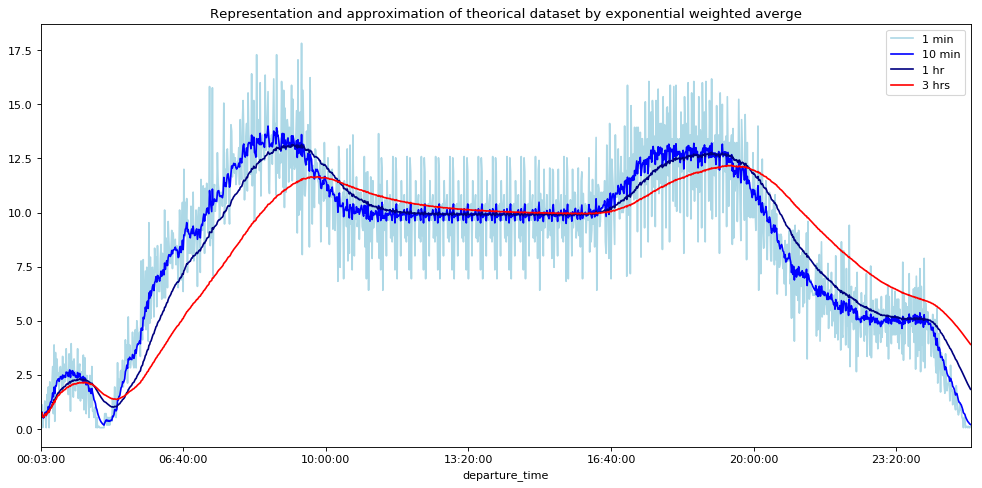

In [30]:
df2 = df.groupby(["departure_time"]).count()/17
v = df2["trip_short_name"]

y1 = v.ewm(span = 180).mean()
y2 = v.ewm(span = 60).mean()
y3 = v.ewm(span = 10).mean()

plt.figure(figsize=(15, 7), dpi= 80, facecolor='w', edgecolor='k')
plt.title("Representation and approximation of theorical dataset by exponential weighted averge")

v.plot(color = 'lightblue', label = "1 min", legend = True ) #''
y3.plot(color = 'b', label = "10 min",legend = True)
y2.plot(color = 'navy', label = "1 hr",legend = True)
y1.plot(color = 'r', label = "3 hrs", legend = True)

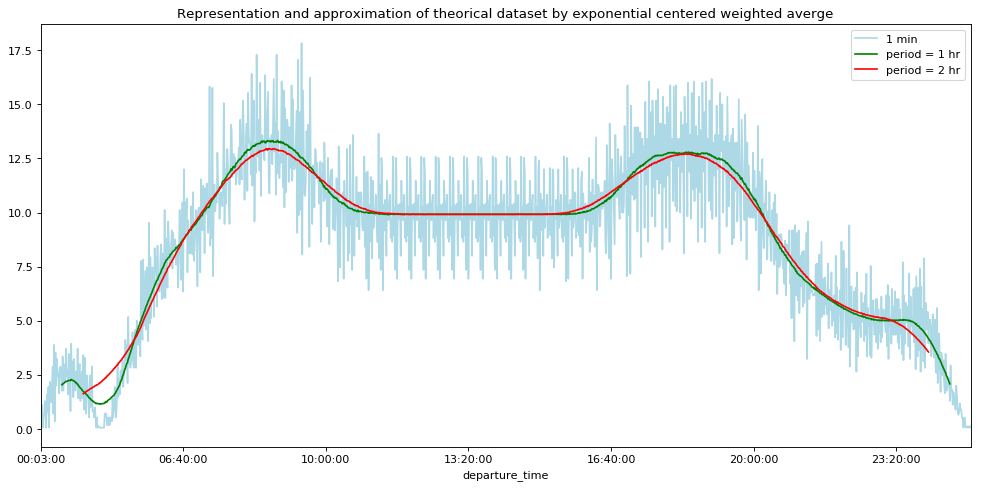

In [31]:
fig = plt.figure(figsize=(15, 7), dpi= 80, facecolor='w', edgecolor='k')
plt.title("Representation and approximation of theorical dataset by exponential centered weighted averge")

p = v.rolling(60, center = True).mean()
#p2 = v.rolling(30, center = True).mean()
p1 = v.rolling(120, center = True).mean()

v.plot(color = 'lightblue', label = "1 min", legend = True)
p.plot(color = 'g', label = "period = 1 hr", legend = True)
p1.plot(color = 'r', label = "period = 2 hr", legend = True)
#plt.plot(p,color='r')

## Real data

In [32]:
histA = pd.read_csv('historic/info_RERA.csv').sort_values("Date")
histA = histA[histA["Date"]//10000 == 20190517]
histA.columns = ["stop_name", "datetime", "Direction", "Sens"]
histA["stop_name"] = histA.stop_name.apply(change_name)

def date_to_datetime(dt):
    temp = dt
    minute = temp%100
    temp //= 100
    hour = temp%100
    temp //= 100
    day = temp%100
    temp //= 100
    month = temp%100
    temp //= 100
    year = temp
    return datetime.datetime(year, month, day, hour, minute, 0)

histA["datetime"] = histA["datetime"].apply(date_to_datetime)
histA.head()

,stop_name,datetime,Direction,Sens
687,Gare de Lyon,2019-05-17 00:05:00,St-Germain-en-Laye. Poissy. Cergy.,A
697,Val d'europe,2019-05-17 00:05:00,St-Germain-en-Laye. Poissy. Cergy.,A
686,Vincennes,2019-05-17 00:05:00,St-Germain-en-Laye. Poissy. Cergy.,A
698,Noisy-Champs,2019-05-17 00:05:00,St-Germain-en-Laye. Poissy. Cergy.,A
699,Bry-Sur-Marne,2019-05-17 00:05:00,St-Germain-en-Laye. Poissy. Cergy.,A


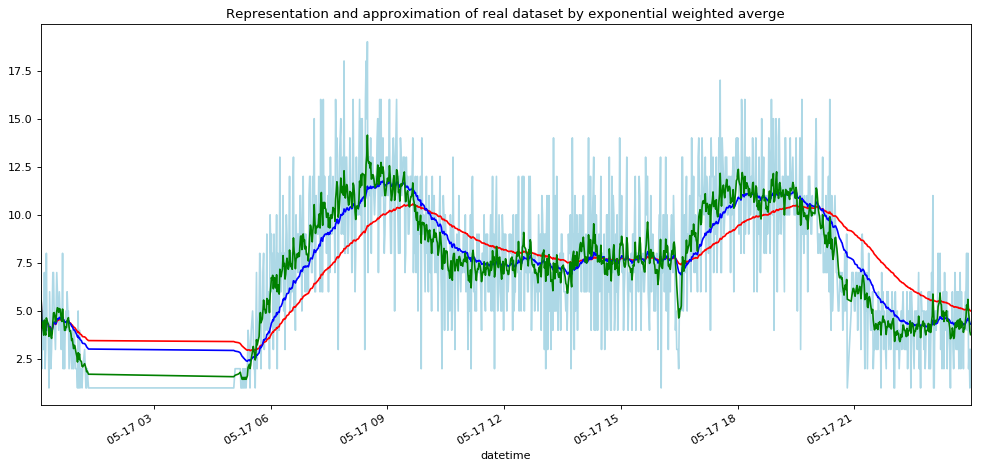

In [33]:
gb = histA.groupby(["datetime"]).count()
v = gb["Direction"]
y1 = v.ewm(span = 180).mean()
y2 = v.ewm(span = 60).mean()
y3 = v.ewm(span = 10).mean()

plt.figure(figsize=(15, 7), dpi= 80, facecolor='w', edgecolor='k')
plt.title("Representation and approximation of real dataset by exponential weighted averge")
v.plot(color = 'lightblue', legend=None)
y1.plot(color = 'red', legend=None)
y2.plot(color = 'blue', legend=None)
y3.plot(color = 'green', legend=None)

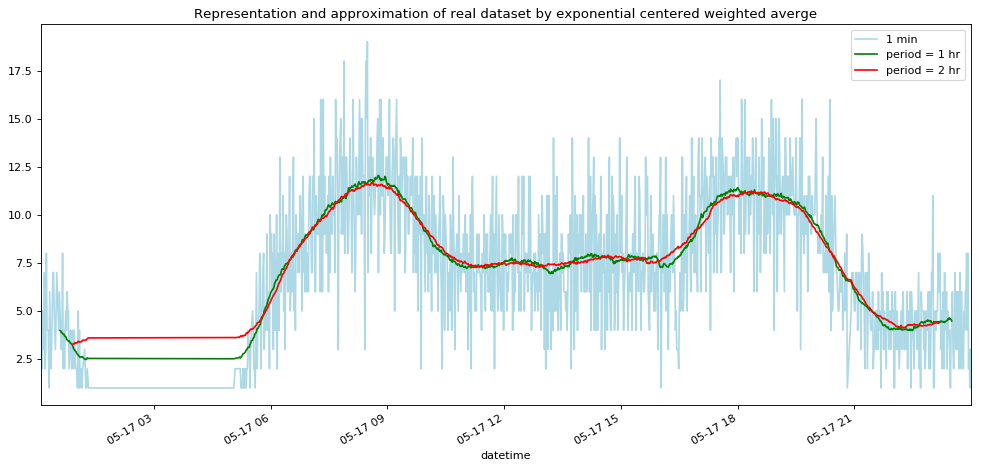

In [34]:
#p1 = v.rolling(30, center = True).mean()
p2 = v.rolling(60, center = True).mean()
p3 = v.rolling(100, center = True).mean()

plt.figure(figsize=(15, 7), dpi= 80, facecolor='w', edgecolor='k')
plt.title("Representation and approximation of real dataset by exponential centered weighted averge")

v.plot(color = 'lightblue', label = "1 min", legend = True)
p2.plot(color = 'g', label = "period = 1 hr", legend = True)
p3.plot(color = 'r', label = "period = 2 hr", legend = True)